In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from fs_ono2020 import FeatureSelector


random_state = 0

### Load MNIST dataset

In [2]:
X, y = datasets.fetch_openml('mnist_784', version=1, data_home=".", return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=True, random_state=random_state)

print("training data shape: ", X_train.shape)

training data shape:  (60000, 784)


### Fit the unsupervised feature selector instance and apply it to the dataset

In [3]:
selector = FeatureSelector(n_features=100, random_state=random_state, logging=True)
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)    # equibalent to X_test[:, selector.selected]

print("training data shape: ", X_train_selected.shape)
print("selected feature indices: ", selector.selected)

Starting to fit Feature Selector.
Objective function initialized: 132002506091.577194
starting loop 1 ... completed. (82 features swapped, obj func: 177309035463.057861)
starting loop 2 ... completed. (14 features swapped, obj func: 177621872420.796112)
starting loop 3 ... completed. (5 features swapped, obj func: 177687064488.499969)
starting loop 4 ... completed. (2 features swapped, obj func: 177765788754.742615)
starting loop 5 ... completed. (1 features swapped, obj func: 177771001267.291107)
starting loop 6 ... completed. (1 features swapped, obj func: 177774439524.066803)
starting loop 7 ... completed. (0 features swapped, obj func: 177774439524.066803)
Feature Selector fitted.
training data shape:  (60000, 100)
selected feature indices:  [180 575 579 628 296 658 347 455 653 234 183 246 632 524 325 159 598 329
 412 405 566 684 238 258 156 577 318 460 189 542 516 209 355 601 398 400
 212 299 469 520 522 465 260 402 634 511 622 582 216 467 127 553 655 546
 150 687 485 205 203 572 

### Visualize the selected features

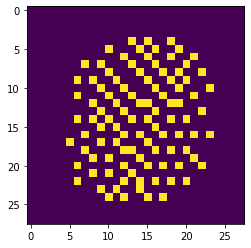

In [4]:
img = np.zeros(selector.original_dim)
img[selector.selected] = 1.
img.resize((28, 28))
plt.imshow(img, vmin=0., vmax=1.)
plt.show()

### Reconstruct vectors from the selected features

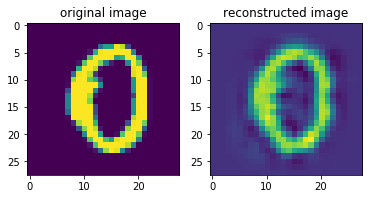

In [5]:
X_test_reconstructed = selector.reconstruct(X_test_selected)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(X_test[0, :].reshape((28, 28)))
ax[0].set_title("original image")
ax[1].imshow(X_test_reconstructed[0, :].reshape((28, 28)))
ax[1].set_title("reconstructed image")
plt.show()